# Nama Kelompok 5


1. Reza Syahputra 185150201111021
2. Joseph Ananda Sugihdharma 1851502001111026
3. Raihan Haikal 185150200111054

# Data CSV From twitter

**Data CSV From twitter**


---


Data didapatkan dari twitter melalui Kafka Streaming dan telah di sesuaikan dengan skema MySQL. Data diambil dari tweet yang mengandung kata "Indihome"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [ ]:
indihome = pd.read_csv('/content/dump.csv')
indihome.head()

,index,user_id,timestamp,text
0,1,"b""1292775313345114112",2020-12-27 22:53:31,@nctzenbase astaghfirullah hampir 6 GB gais pa...
1,2,"b""1075673058931806208",2020-12-27 22:53:11,"@fridays_mood Sama sama Kak Michael, Herland i..."
2,3,"b""1300965595823837184",2020-12-27 22:53:38,@IndiHome Min syaa gk sengaja kepencet radio o...
3,4,"b""1272042944438996993",2020-12-27 22:52:58,@Rainforesttttt udah biasa dikerjain indihome ...
4,5,"b""1318717270101614592",2020-12-27 22:52:38,@ljenocute @nctzenbase astaghfirullah hampir 6...


In [ ]:
indihome = indihome.drop(columns=['index', 'user_id', 'timestamp'])
indihome

,text
0,@nctzenbase astaghfirullah hampir 6 GB gais pa...
1,"@fridays_mood Sama sama Kak Michael, Herland i..."
2,@IndiHome Min syaa gk sengaja kepencet radio o...
3,@Rainforesttttt udah biasa dikerjain indihome ...
4,@ljenocute @nctzenbase astaghfirullah hampir 6...
...,...
15095,@IndiHome Cek DM kak sekarang'
15096,"@99pokemon_go Kak Aria, sudah dibantu respon D..."
15097,@dietsney @IndiHome pke kuota aja bun lancar j...
15098,"@sibenroki Hallo, Kak Roki. Perihal akses inte..."


In [ ]:
indihome['text'] =  [re.sub(r"b'|b\'|b\"|\\[a-z][0-9][a-z]|\\[a-z][a-z][0-9]|\\n|\\\\[x][0-9][0-9]\\|\'|x[a-z][a-z]|x[0-9][0-9]", 
                           "", str(j)) for j in indihome['text']]
indihome.head()

,text
0,@nctzenbase astaghfirullah hampir 6 GB gais pa...
1,"@fridays_mood Sama sama Kak Michael, Herland i..."
2,@IndiHome Min syaa gk sengaja kepencet radio o...
3,@Rainforesttttt udah biasa dikerjain indihome ...
4,@ljenocute @nctzenbase astaghfirullah hampir 6...


# Text Preprocessing

**Text PreProcessing**


---



Case Folding

In [ ]:
# gunakan fungsi Series.str.lower() pada Pandas
indihome['text'] = indihome['text'].str.lower()


print('Case Folding Result : \n')
print(indihome['text'].head(5))

Case Folding Result : 

0    @nctzenbase astaghfirullah hampir 6 gb gais pa...
1    @fridays_mood sama sama kak michael, herland i...
2    @indihome min syaa gk sengaja kepencet radio o...
3    @rainforesttttt udah biasa dikerjain indihome ...
4    @ljenocute @nctzenbase astaghfirullah hampir 6...
Name: text, dtype: object


Tokenization

In [ ]:
import string 
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# ------ Tokenizing ---------

def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
indihome['text'] = indihome['text'].apply(remove_tweet_special)

In [ ]:
#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

indihome['text'] = indihome['text'].apply(remove_number)

In [ ]:
#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

indihome['text'] = indihome['text'].apply(remove_punctuation)

In [ ]:
#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

indihome['text'] = indihome['text'].apply(remove_whitespace_LT)

In [ ]:
#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

indihome['text'] = indihome['text'].apply(remove_whitespace_multiple)

In [ ]:
# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

indihome['text'] = indihome['text'].apply(remove_singl_char)

In [ ]:
def word_tokenize_wrapper(text):
    return word_tokenize(text)

indihome['token_text'] = indihome['text'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(indihome.head())

Tokenizing Result : 

                                                text                                         token_text
0  astaghfirullah hampir gb gais pake telkomsel g...  [astaghfirullah, hampir, gb, gais, pake, telko...
1  mood sama sama kak michael herland ingin konfi...  [mood, sama, sama, kak, michael, herland, ingi...
2  min syaa gk sengaja kepencet radio off lalu se...  [min, syaa, gk, sengaja, kepencet, radio, off,...
3   udah biasa dikerjain indihome kalo pas ujan gini  [udah, biasa, dikerjain, indihome, kalo, pas, ...
4  astaghfirullah hampir gb gais pake telkomsel g...  [astaghfirullah, hampir, gb, gais, pake, telko...


In [ ]:
# NLTK calc frequency distribution
def freqDist_wrapper(text):
    return FreqDist(text)

indihome['token_text_freq'] = indihome['token_text'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(indihome['token_text_freq'].head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(astaghfirullah, 1), (hampir, 1), (gb, 1), (g...
1    [(sama, 2), (kak, 2), (herland, 2), (mood, 1),...
2    [(min, 1), (syaa, 1), (gk, 1), (sengaja, 1), (...
3    [(udah, 1), (biasa, 1), (dikerjain, 1), (indih...
4    [(astaghfirullah, 1), (hampir, 1), (gb, 1), (g...
Name: token_text_freq, dtype: object


Filtering

In [ ]:
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')
# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'gk', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

In [ ]:
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

indihome['token_text_SR'] = indihome['token_text'].apply(stopwords_removal) 


print(indihome['token_text_SR'].head())

0    [astaghfirullah, gb, gais, pake, telkomsel, ga...
1    [mood, kak, michael, herland, konfirmasi, indi...
2    [min, syaa, sengaja, kepencet, radio, off, sin...
3         [udah, dikerjain, indihome, pas, ujan, gini]
4    [astaghfirullah, gb, gais, pake, telkomsel, ga...
Name: token_text_SR, dtype: object


Stemmer

In [ ]:
!pip install Sastrawi
!pip install swifter

     |████████████████████████████████| 215kB 7.0MB/s 
     |████████████████████████████████| 634kB 9.0MB/s 
     |████████████████████████████████| 296kB 16.5MB/s 
     |████████████████████████████████| 542kB 19.3MB/s 
     |████████████████████████████████| 102kB 8.6MB/s 
     |████████████████████████████████| 17.2MB 234kB/s 
     |████████████████████████████████| 48.5MB 77kB/s 
     |████████████████████████████████| 81kB 7.1MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 81kB 9.5MB/s 
     |████████████████████████████████| 204kB 41.1MB/s 
     |████████████████████████████████| 2.9MB 42.6MB/s 
     |████████████████████████████████| 133kB 49.1MB/s 
     |████████████████████████████████| 1.3MB 37.0MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 143kB 48.6MB/s 
     |████████████████████████████████| 296kB 43.3MB/s 
     |████████████████████████████████| 102kB 10.9MB/s 
  Cr

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

In [ ]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in indihome['token_text_SR']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

indihome['tweet_tokens_stemmed'] = indihome['token_text_SR'].swifter.apply(get_stemmed_term)
print(indihome['tweet_tokens_stemmed'])

Output streaming akan dipotong hingga 5000 baris terakhir.
polos : polos
diweb : diweb
penawarannya : tawar
henchan : henchan
tendensius : tendensius
ginibagaimana : ginibagaimana
comot : comot
menerawang : terawang
makhluk : makhluk
tyda : tyda
tawu : tawu
kebanggaan : bangga
cece : cece
aphaaa : aphaaa
beginii : begini
arumpus : arumpus
kelapa : kelapa
ochan : ochan
pdohhh : pdohhh
lagunya : lagu
indihomexb : indihomexb
dedy : dedy
brikan : brikan
mlu : mlu
bengekk : bengekk
mulung : mulung
cendol : cendol
soba : soba
konfirmasin : konfirmasin
jutnya : jutnya
pantun : pantun
apanihh : apanihh
dicanio : dicanio
bck : bck
dgnmu : dgnmu
bgtt : bgtt
maya : maya
dijelasin : dijelasin
macetnya : macet
mudik : mudik
awam : awam
kack : kack
bayyy : bayyy
muach : muach
hehehehehhehehehehheehheheehheheehheheheeh : hehehehehhehehehehheehheheehheheehheheheeh
dunk : dunk
shombong : shombong
ardho : ardho
duwi : duwi
apartemen : apartemen
ngamoook : ngamoook
py : py
tgg : tgg
berantakan : beranta



0        [astaghfirullah, gb, gais, pake, telkomsel, ga...
1        [mood, kak, michael, herland, konfirmasi, indi...
2        [min, syaa, sengaja, pencet, radio, off, sinya...
3              [udah, dikerjain, indihome, pas, ujan, gin]
4        [astaghfirullah, gb, gais, pake, telkomsel, ga...
                               ...                        
15095                                       [cek, dm, kak]
15096    [go, kak, aria, bantu, respon, dmnya, rekan, l...
15097                      [pke, kuota, bun, lancar, jaya]
15098    [hallo, kak, roki, perihal, akses, internetnya...
15099    [indihome, kau, ni, da, kuota, kau, sulit, hid...
Name: tweet_tokens_stemmed, Length: 15100, dtype: object


In [ ]:
  indihome.to_csv("Text_Preprocessing.csv")

# Clustering

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

import nltk
import string

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')


# email module has some useful functions
import os, sys, email,re

df = pd.read_csv('/content/Text_Preprocessing.csv',nrows = 35000)
df

,Unnamed: 0,text,token_text,token_text_freq,token_text_SR,tweet_tokens_stemmed
0,0,astaghfirullah hampir gb gais pake telkomsel g...,"['astaghfirullah', 'hampir', 'gb', 'gais', 'pa...",<FreqDist with 15 samples and 15 outcomes>,"['astaghfirullah', 'gb', 'gais', 'pake', 'telk...","['astaghfirullah', 'gb', 'gais', 'pake', 'telk..."
1,1,mood sama sama kak michael herland ingin konfi...,"['mood', 'sama', 'sama', 'kak', 'michael', 'he...",<FreqDist with 17 samples and 20 outcomes>,"['mood', 'kak', 'michael', 'herland', 'konfirm...","['mood', 'kak', 'michael', 'herland', 'konfirm..."
2,2,min syaa gk sengaja kepencet radio off lalu se...,"['min', 'syaa', 'gk', 'sengaja', 'kepencet', '...",<FreqDist with 26 samples and 26 outcomes>,"['min', 'syaa', 'sengaja', 'kepencet', 'radio'...","['min', 'syaa', 'sengaja', 'pencet', 'radio', ..."
3,3,udah biasa dikerjain indihome kalo pas ujan gini,"['udah', 'biasa', 'dikerjain', 'indihome', 'ka...",<FreqDist with 8 samples and 8 outcomes>,"['udah', 'dikerjain', 'indihome', 'pas', 'ujan...","['udah', 'dikerjain', 'indihome', 'pas', 'ujan..."
4,4,astaghfirullah hampir gb gais pake telkomsel g...,"['astaghfirullah', 'hampir', 'gb', 'gais', 'pa...",<FreqDist with 11 samples and 11 outcomes>,"['astaghfirullah', 'gb', 'gais', 'pake', 'telk...","['astaghfirullah', 'gb', 'gais', 'pake', 'telk..."
...,...,...,...,...,...,...
15095,15095,cek dm kak sekarang,"['cek', 'dm', 'kak', 'sekarang']",<FreqDist with 4 samples and 4 outcomes>,"['cek', 'dm', 'kak']","['cek', 'dm', 'kak']"
15096,15096,go kak aria sudah dibantu respon dmnya oleh re...,"['go', 'kak', 'aria', 'sudah', 'dibantu', 'res...",<FreqDist with 15 samples and 18 outcomes>,"['go', 'kak', 'aria', 'dibantu', 'respon', 'dm...","['go', 'kak', 'aria', 'bantu', 'respon', 'dmny..."
15097,15097,pke kuota aja bun lancar jaya,"['pke', 'kuota', 'aja', 'bun', 'lancar', 'jaya']",<FreqDist with 6 samples and 6 outcomes>,"['pke', 'kuota', 'bun', 'lancar', 'jaya']","['pke', 'kuota', 'bun', 'lancar', 'jaya']"
15098,15098,hallo kak roki perihal akses internetnya sudah...,"['hallo', 'kak', 'roki', 'perihal', 'akses', '...",<FreqDist with 20 samples and 21 outcomes>,"['hallo', 'kak', 'roki', 'perihal', 'akses', '...","['hallo', 'kak', 'roki', 'perihal', 'akses', '..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = df['tweet_tokens_stemmed']


tf_idf_vectorizor = TfidfVectorizer(#stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [ ]:
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names()).head()

,aa,aaa,aaaa,aaaaa,aaaaaa,aaaaaaa,aaaaak,aaahkh,aabila,aah,aahhhh,aamajang,aamiin,aan,aar,abad,abai,abang,abaz,abazkak,abbi,abdi,abduh,abdul,abdullah,abel,abelle,abes,abg,abhi,abi,abieezz,abiez,abimanyu,abin,abis,abissa,abiyyu,abonemen,abrizal,...,zaman,zami,zanya,zara,zaroen,zas,zavier,zayn,zee,zefa,zefaaaaa,zen,zenius,zia,zid,zidan,zihan,zireby,zkzkzkzkz,zly,zm,zoko,zonk,zoom,zooman,zroity,zte,zul,zulfa,zulfadlan,zulhardiansyah,zull,zuma,zummy,zuniq,zy,zya,zyan,zzzz,zzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


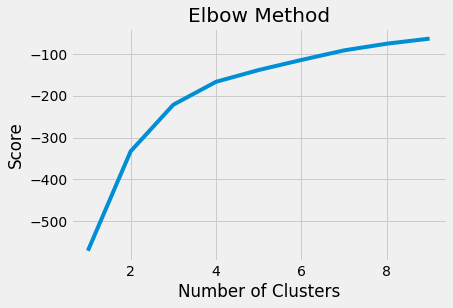

In [ ]:
from sklearn.cluster import KMeans
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

number_clusters = range(1, 10)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

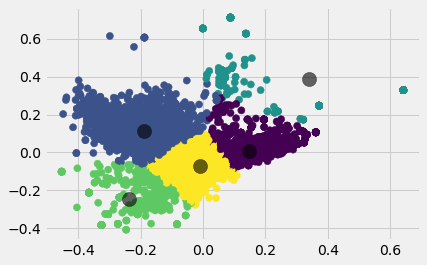

In [ ]:
from sklearn.cluster import KMeans
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=5, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=50, cmap='viridis')

centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=200, alpha=0.6)



In [ ]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 15)

Text(0.5, 1.0, 'Cluster 1')

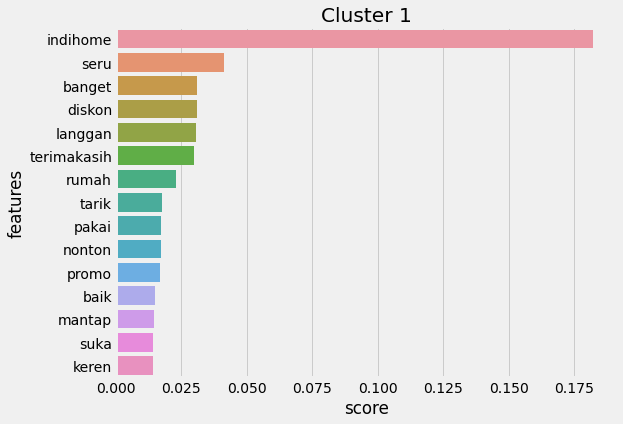

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[0][:15])
ax.set_title('Cluster 1')

Text(0.5, 1.0, 'Cluster 2')

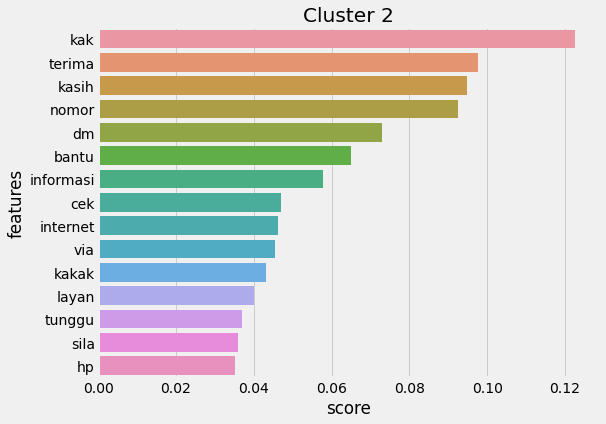

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[1][:15])
ax.set_title('Cluster 2')

Text(0.5, 1.0, 'Cluster 3')

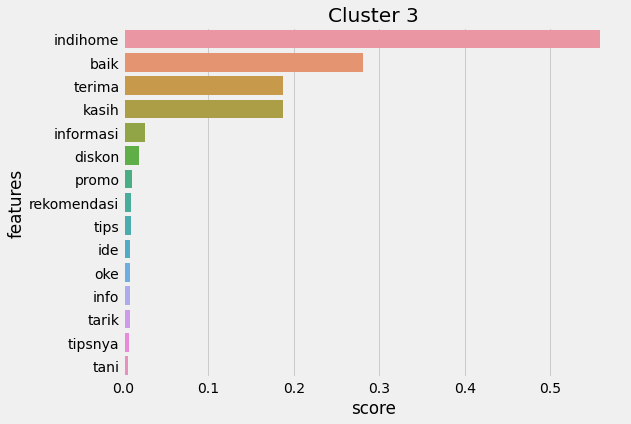

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[2][:15])
ax.set_title('Cluster 3')

Text(0.5, 1.0, 'Cluster 4')

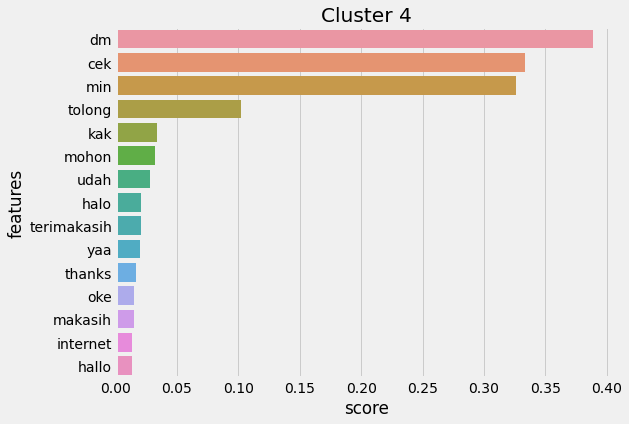

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[3][:15])
ax.set_title('Cluster 4')

Text(0.5, 1.0, 'Cluster 5')

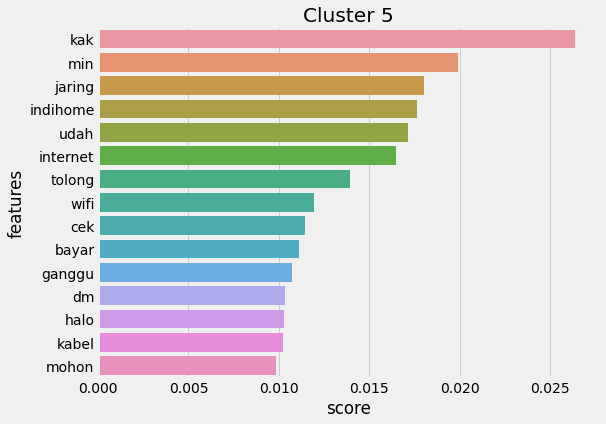

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[4][:15])
ax.set_title('Cluster 5')